<a href="https://colab.research.google.com/github/juandavidarcila/Metodos-Computacionales/blob/main/Actividades-Complementaria/ArcilaJuan_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Problema 1

Implemente el método de interpolación de Lagrange que ajuste un polinomio de grado 4 a los siguientes datos experimentales.



```
    x_values = 4, 7, 8, 12,  17
    y_values = 8, 16, 3,  5,  0
```

El código debe generar una figura que contenga los puntos asociados a los datos experimentales y la curva generada por el polinomio de Lagrange. Gráfique en el intervalo $[3, 18]$.

0.03464457913758068
2.7165109710125535e-05
1.8888002273342863e-11
9.965328255733821


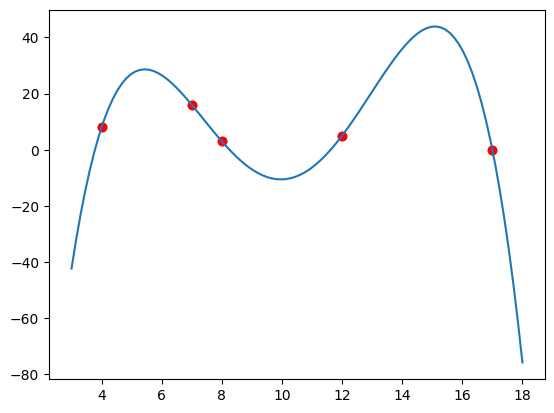

In [15]:
X = np.array([ 4, 7, 8, 12,  17])
Y = np.array([ 8, 16, 3,  5,  0])

## tu codigo aqui
def Lagrange(x,X,i):

  L = 1 # Productoria
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

plt.scatter(X,Y,color='r')

x = sym.Symbol('x',real=True)
x**2

L0 = Lagrange(x,X,1).simplify()

def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

p1 = Interpolate(x,X,Y).expand()

pp1 = sym.Poly(p1)
coeficientes = np.array(pp1.all_coeffs(),float)

dp1 = sym.diff(p1,x)
dp2 = sym.diff(dp1,x)

dp1n = sym.lambdify(x,dp1,'numpy')
dp2n = sym.lambdify(x,dp2,'numpy')

x0 = 10
error = 10
while error > 1e-9:
  x1 = x0 - dp1n(x0)/dp2n(x0)
  error = np.abs(x1-x0)
  print(error)
  x0 = x1
print(x0)

x1 = np.linspace(3,18,100)
y1 = Interpolate(x1,X,Y)

plt.scatter(X,Y,color='r')
plt.plot(x1,y1)

b) Explique cuál es la intuición detras de la fórmula de interpolación de Lagrange.

Tu texto aqui

La interpolación de Lagrange busca dibujar una sola curva que pase exactamente por todos los puntos experimentales. La idea es construirla usando pequeñas funciones que se activan en cada punto y no afectan a los demás, al sumarlas, se obtiene una curva continua que respeta todos los datos y permite estimar valores entre ellos. Básicamente, es una forma matemática de unir los puntos con una función suave que los representa lo mejor posible dentro del intervalo observado.

## Problema 2

Diseñe un método que obtenga el valor en $x$ para el cual el polinomio interpolador del problema anterior es máximo. Guarde el resultado obtenido en la variable `x_value`, e imprima ese valor.

In [31]:
x_value = 0

## tu codigo aqui
p1 = Interpolate(x, X, Y) #Polinomio

der1 = sym.diff(p1, x)
der2 = sym.diff(der1, x)

der1_fun = sym.lambdify(x, der1, 'numpy')
der2_fun = sym.lambdify(x, der2, 'numpy')

x0 = 13
error = 10
while error > 1e-12:
  x1 = x0 - der1_fun(x0)/der2_fun(x0)
  error = np.abs(x1-x0)
  x0 = x1
x_value = x0



# codigo para verificar su resultado (no modificar)
print(x_value)

15.088457548246474
